Clasifica el tipo de espacio que el anfitrión está ofreciendo para alquilar. 

Room_type
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'Review_scores_accuracy' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['room_type'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'Review_scores_accuracy' existe en el DataFrame
if 'room_type' in data.columns:
    # Tipo de dato
    tipo_dato = data['room_type'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['room_type'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['room_type'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['room_type'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['room_type'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'room_type':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'room_type' no existe en el DataFrame.")

print(data['room_type'].value_counts())
print(data['room_type'].unique())

Columna 'room_type':
 - Tipo de dato: object
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 4
 - Cantidad de datos totales: 279712
room_type
Entire place    182005
Private room     86988
Hotel room        5857
Shared room       4862
Name: count, dtype: int64
['Entire place' 'Private room' 'Hotel room' 'Shared room']


Analisis caulitativo:
* Cantidad de datos difernets
* Moda
* Cantidad por variable
* Porcentaje por variable
* Obtener Frecuencia Absoluta
* Frecuencia Relativa

In [2]:
if 'room_type' in data.columns: 
    # Moda
    moda = data['room_type'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['room_type'].value_counts()
    
    # Porcentaje por variable
    porcentaje_por_variable = (cantidad_por_variable / cantidad_totales) * 100
    
    # Imprimir resultados formateados
    print(f"Columna 'room_type':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad}")
    print("\n - Porcentaje por variable:")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'room_type' no existe en el DataFrame.")

Columna 'room_type':
 - Moda: Entire place

 - Cantidad por variable:
   Entire place: 182005
   Private room: 86988
   Hotel room: 5857
   Shared room: 4862

 - Porcentaje por variable:
   Entire place: 65.07%
   Private room: 31.10%
   Hotel room: 2.09%
   Shared room: 1.74%


Grafica

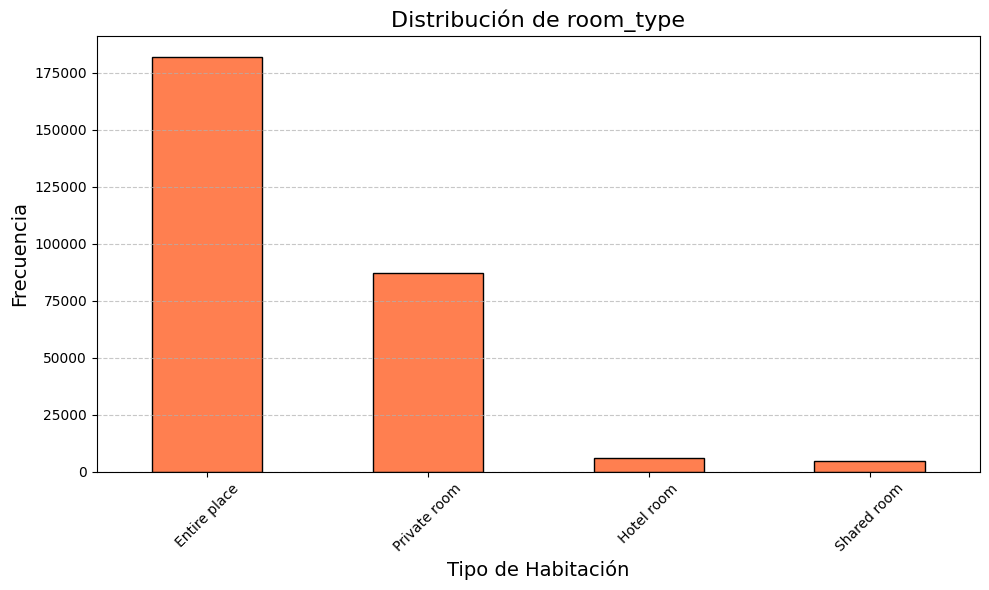

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar únicamente la columna 'room_type' del archivo CSV


# Verificar si la columna 'room_type' existe en el DataFrame
if 'room_type' in data.columns:
    # Contar la frecuencia de cada valor
    value_counts = data['room_type'].value_counts()

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Distribución de room_type', fontsize=16)
    plt.xlabel('Tipo de Habitación', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
else:
    print("La columna 'room_type' no existe en el DataFrame.")

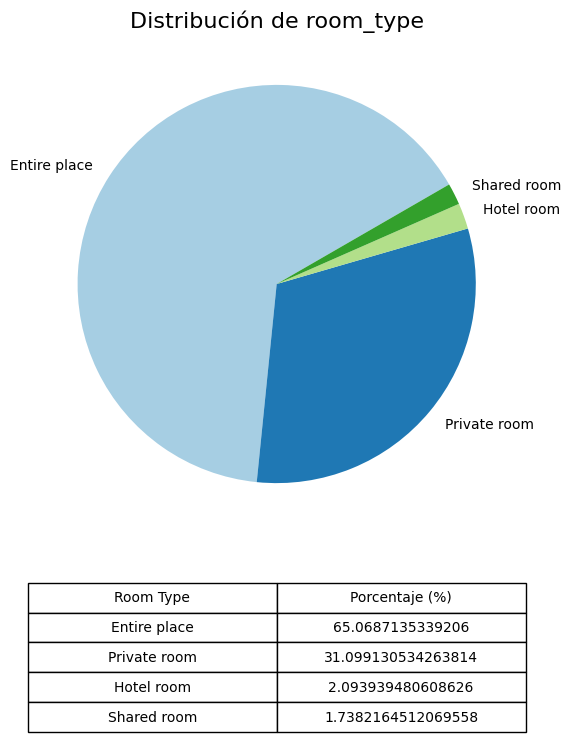

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

# Cargar únicamente la columna 'room_type' del archivo CSV


# Verificar si la columna 'room_type' existe en el DataFrame
if 'room_type' in data.columns:
    # Contar la frecuencia de cada valor
    value_counts = data['room_type'].value_counts()
    porcentajes = (value_counts / value_counts.sum()) * 100

    # Definir colores
    colores = plt.cm.Paired.colors[:len(value_counts)]

    # Crear el gráfico de tarta sin porcentajes dentro
    fig, ax = plt.subplots(figsize=(8, 8))
    value_counts.plot(kind='pie', startangle=30, colors=colores, ax=ax)
    ax.set_title('Distribución de room_type', fontsize=16)
    ax.set_ylabel('')  # Eliminar etiqueta del eje Y para una mejor visualización

    # Crear la tabla debajo de la gráfica
    tabla = pd.DataFrame({
        'Room Type': value_counts.index,
        'Porcentaje (%)': porcentajes.values,
        
    })
    plt.table(cellText=tabla.values,
              colLabels=tabla.columns,
              cellLoc='center',
              loc='bottom',
              bbox=[0.0, -0.4, 1, 0.3])  # Ajustar posición de la tabla

    plt.tight_layout()
    plt.show()
else:
    print("La columna 'room_type' no existe en el DataFrame.")

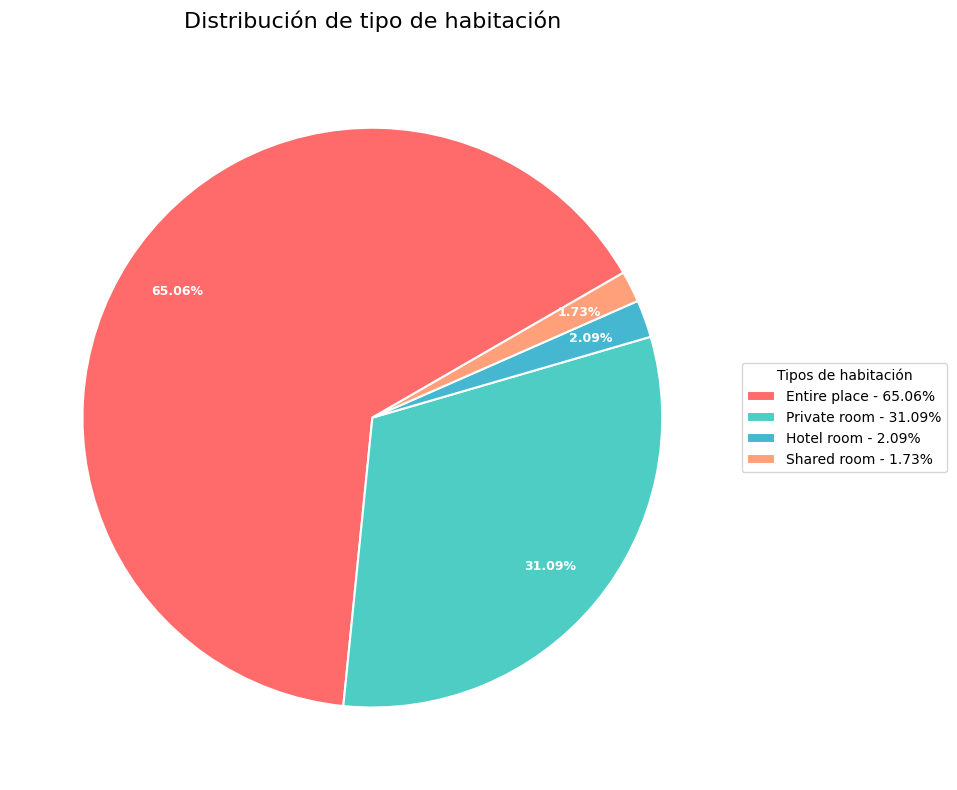


Valores exactos:
   Room Type  Count Percentage
Entire place 182005     65.06%
Private room  86988     31.09%
  Hotel room   5857      2.09%
 Shared room   4862      1.73%


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar únicamente la columna 'room_type'   
if 'room_type' in data.columns:
    # Calcular frecuencias y porcentajes exactos
    value_counts = data['room_type'].value_counts()
    total = value_counts.sum()
    porcentajes = (value_counts / total) * 100
    
    # Paleta de colores exacta como en gráficos anteriores
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Función para mostrar valores truncados (no aproximados)
    def formato_truncado(pct):
        # Convertir a string y truncar a 2 decimales sin aproximar
        pct_str = str(pct)
        # Encontrar el punto decimal
        if '.' in pct_str:
            entero, decimal = pct_str.split('.')
            # Truncar a 2 decimales (no redondear)
            if len(decimal) >= 2:
                decimal = decimal[:2]
            return f"{entero}.{decimal}%"
        else:
            return f"{pct_str}.00%"
    
    # Gráfico de pie con valores truncados y sin conteo
    wedges, texts, autotexts = ax.pie(
        value_counts,
        colors=colors[:len(value_counts)],
        startangle=30,
        wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
        autopct=lambda pct: formato_truncado(pct),
        pctdistance=0.8,
        textprops={'fontsize': 9, 'color': 'white', 'weight': 'bold'}
    )
    
    # Leyenda con porcentajes truncados
    legend_labels = []
    for tipo in value_counts.index:
        # Truncar (no aproximar) el porcentaje a 2 decimales
        pct_str = str(porcentajes[tipo])
        if '.' in pct_str:
            entero, decimal = pct_str.split('.')
            if len(decimal) >= 2:
                decimal = decimal[:2]
            legend_labels.append(f"{tipo} - {entero}.{decimal}%")
        else:
            legend_labels.append(f"{tipo} - {pct_str}.00%")
    
    ax.legend(
        wedges, 
        legend_labels,
        title="Tipos de habitación",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=10
    )
    
    ax.set_title('Distribución de tipo de habitación', fontsize=16, pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Tabla con valores truncados
    print("\nValores exactos:")
    percentages_truncated = []
    for p in porcentajes:
        pct_str = str(p)
        if '.' in pct_str:
            entero, decimal = pct_str.split('.')
            if len(decimal) >= 2:
                decimal = decimal[:2]
            percentages_truncated.append(f"{entero}.{decimal}%")
        else:
            percentages_truncated.append(f"{pct_str}.00%")
            
    exact_df = pd.DataFrame({
        'Room Type': value_counts.index,
        'Count': value_counts.values,
        'Percentage': percentages_truncated
    })
    print(exact_df.to_string(index=False))
    
else:
    print("La columna 'room_type' no existe en el DataFrame.")